## Applied Machine Learning - Homework 2 (Question 2)

I shall be taking the heart disease dataset from UCIMachine Learning Repository to perform classification on it

The dataset features:

Only 14 attributes used:

  1. #3  (age) :age in years      

  2. #4  (sex) :(1 = male; 0 = female)

  3. #9  (cp)  :chest pain type

         -- Value 1: typical angina

         -- Value 2: atypical angina

         -- Value 3: non-anginal pain

         -- Value 4: asymptomatic  

  4. #10 (trestbps) : resting blood pressure (in mm Hg on admission to the hospital)
  
  5. #12 (chol) : serum cholestoral in mg/dl

  6. #16 (fbs) : (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)       
      
  7. #19 (restecg) : resting electrocardiographic results
          -- Value 0: normal

          -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

          -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

  8. #32 (thalach)  : maximum heart rate achieved

  9. #38 (exang)  : exercise induced angina (1 = yes; 0 = no)

  10. #40 (oldpeak) :  ST depression induced by exercise relative to rest

  11. #41 (slope)  : the slope of the peak exercise ST segment
          -- Value 1: upsloping

          -- Value 2: flat

          -- Value 3: downsloping

  12. #44 (ca) : number of major vessels (0-3) colored by flourosopy

  13. #51 (thal) : 3 = normal; 6 = fixed defect; 7 = reversable defect

  14. #58 (num) :diagnosis of heart disease (angiographic disease status)

          -- Value 0: < 50% diameter narrowing

          -- Value 1: > 50% diameter narrowing



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, scale
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
file_path = '/content/processed.cleveland.data'
df = pd.read_csv(file_path, header=None)


In [3]:
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df.columns = column_names
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Are there any attributes that might require special treatment? If so, what special treatment might they require?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


Out of 14 features, there are 12 numerical features and 2 object type features.



In [5]:
df.shape

(303, 14)

In [6]:
print("Statistical values for each attribute:")
df.describe()

Statistical values for each attribute:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [7]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [8]:
df.duplicated().sum()

0

In [9]:
# Check the percentage of categories present in target variable
df['target'].value_counts(normalize=True)

,proportion
target,
0,0.541254
1,0.181518
2,0.118812
3,0.115512
4,0.042904


In [10]:
# Check the value_counts of the object attribute 'thal'
df['thal'].value_counts()

,count
thal,
3.0,166
7.0,117
6.0,18
?,2


In [11]:
# Check the value_counts of the object attribute 'ca'
df['ca'].value_counts()

,count
ca,
0.0,176
1.0,65
2.0,38
3.0,20
?,4


**Are there any attributes that might require special treatment? If so, what special
treatment might they require?**

Target value: The multiple values from 1 to 4 in the target variable seem to denote different levels of heart disease severity. We shall combine them to a single value : 1

ca and thal: The rows containg the '?' as the value are missing values. They can either be imputed or dropped. Since there are only 303 entries, dropping these rows mean removing 1-2% of the dataset. We shall convert these features into numerical type and then impute the missing values.

In [12]:
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# Verify the new value counts
print(df['target'].value_counts(normalize=True))

target
0    0.541254
1    0.458746
Name: proportion, dtype: float64


In [13]:
# Replace '?' with NaN and convert to numeric type
df['ca'] = pd.to_numeric(df['ca'].replace('?', np.nan))
df['thal'] = pd.to_numeric(df['thal'].replace('?', np.nan))

# Impute missing values with the mean
df['ca']=df['ca'].fillna(df['ca'].median())
df['thal']=df['thal'].fillna(df['thal'].median())

In [14]:
df['ca'].value_counts()

,count
ca,
0.0,180
1.0,65
2.0,38
3.0,20


In [15]:
df['thal'].value_counts()

,count
thal,
3.0,168
7.0,117
6.0,18


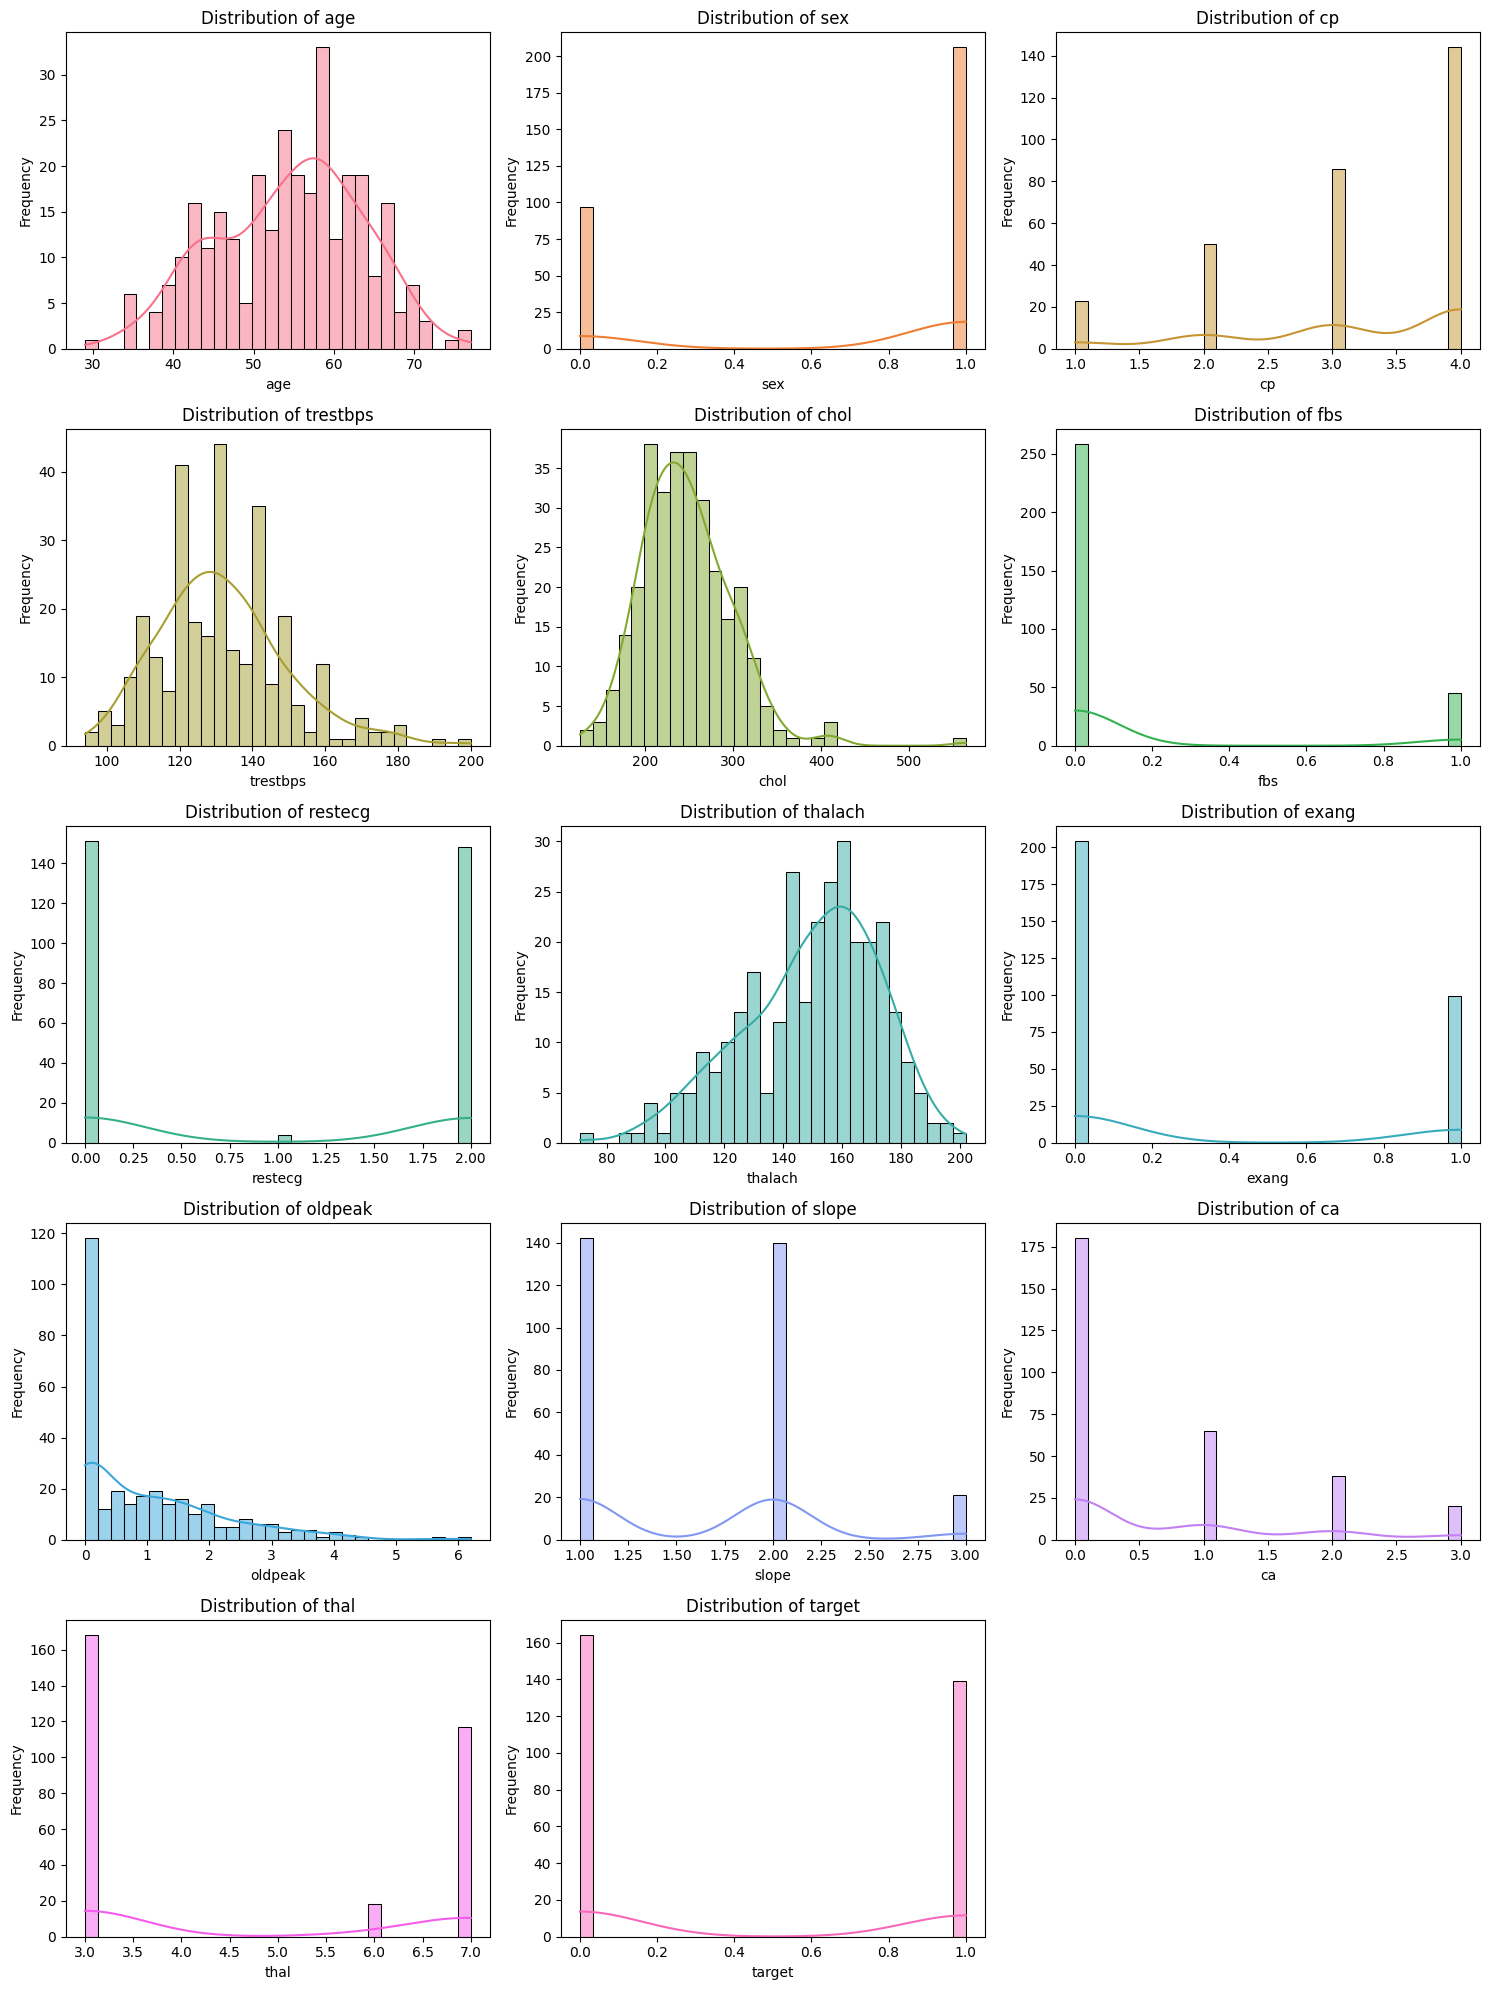

In [16]:
custom_palette = sns.color_palette("husl", len(df.select_dtypes(include=np.number).columns))

# Set up the figure and axes
fig, axes = plt.subplots(5, 3, figsize=(15, 20))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the 5x3 grid to iterate over

# Loop through each numerical column and create a histogram on a subplot
for i, col in enumerate(df.select_dtypes(include=np.number).columns):
    sns.histplot(df[col], kde=True, color=custom_palette[i], bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

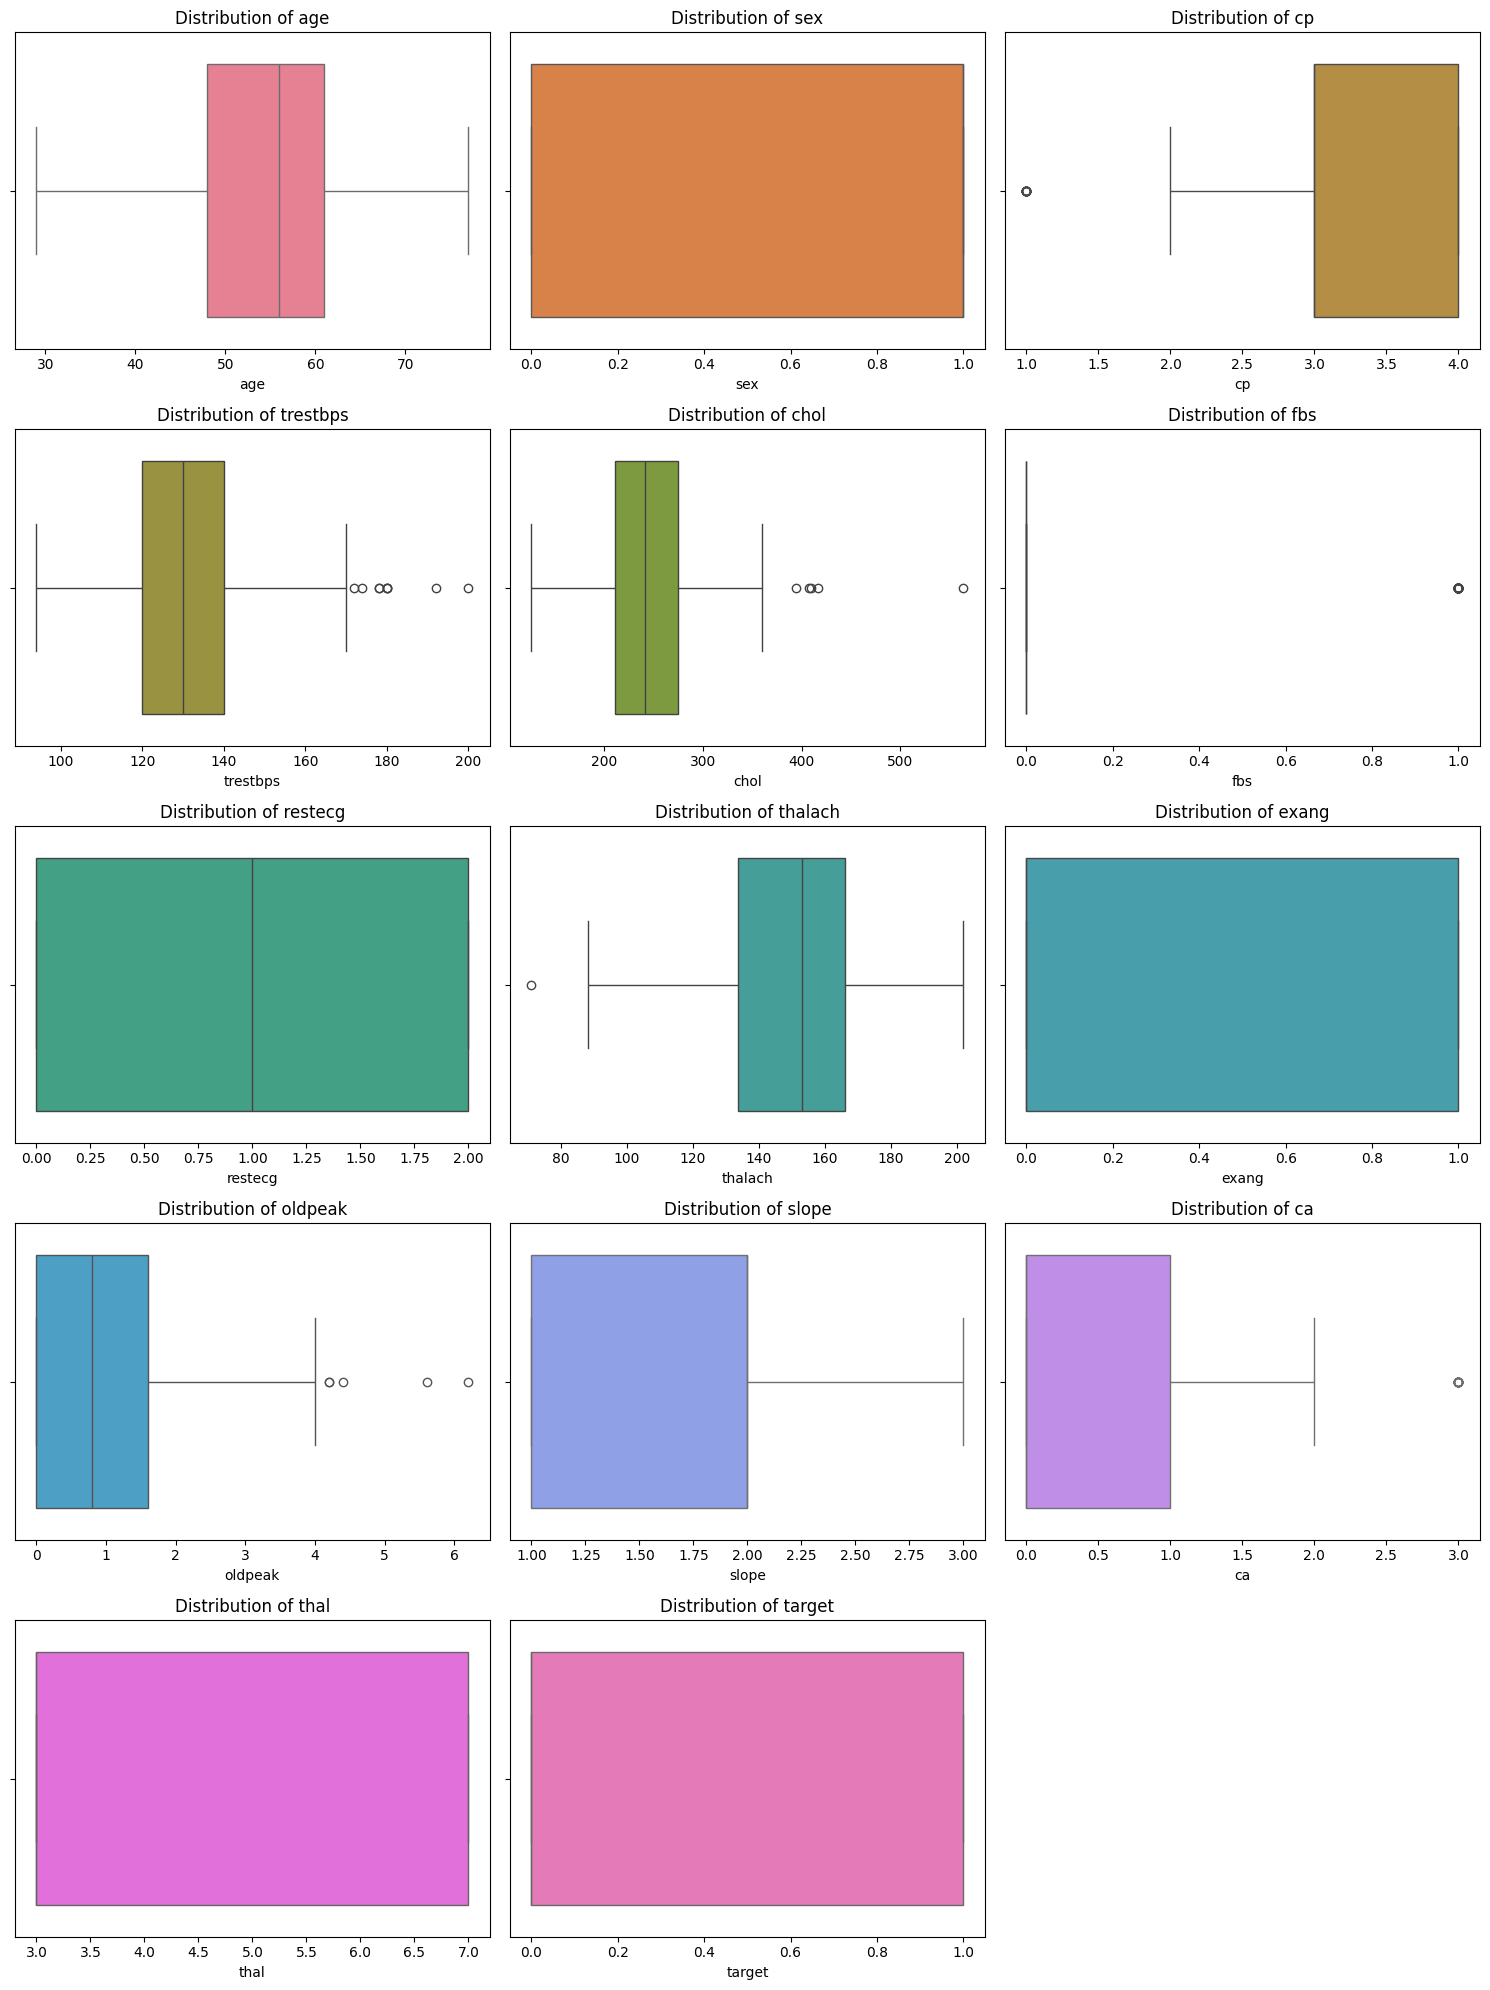

In [17]:
fig, axes = plt.subplots(5, 3, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(df.select_dtypes(include=np.number).columns):
    sns.boxplot(x=df[col], orient='h', color=custom_palette[i], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

There seem to be a few outliers present in the columns trestbps, chol, oldpeak and one or two outliers in the columns ca, thalach and fbs.

Since SVC is sensitive to outliers, we shall cap them.

In [18]:
# Define the cap percentiles
lower_cap = 0.01  # 1st percentile
upper_cap = 0.97  # 97th percentile

for col in ['chol', 'trestbps', 'oldpeak','ca','thalach','fbs']:
    lower_bound = np.percentile(df[col], lower_cap * 100)
    upper_bound = np.percentile(df[col], upper_cap * 100)
    df[col] = np.clip(df[col], lower_bound, upper_bound)


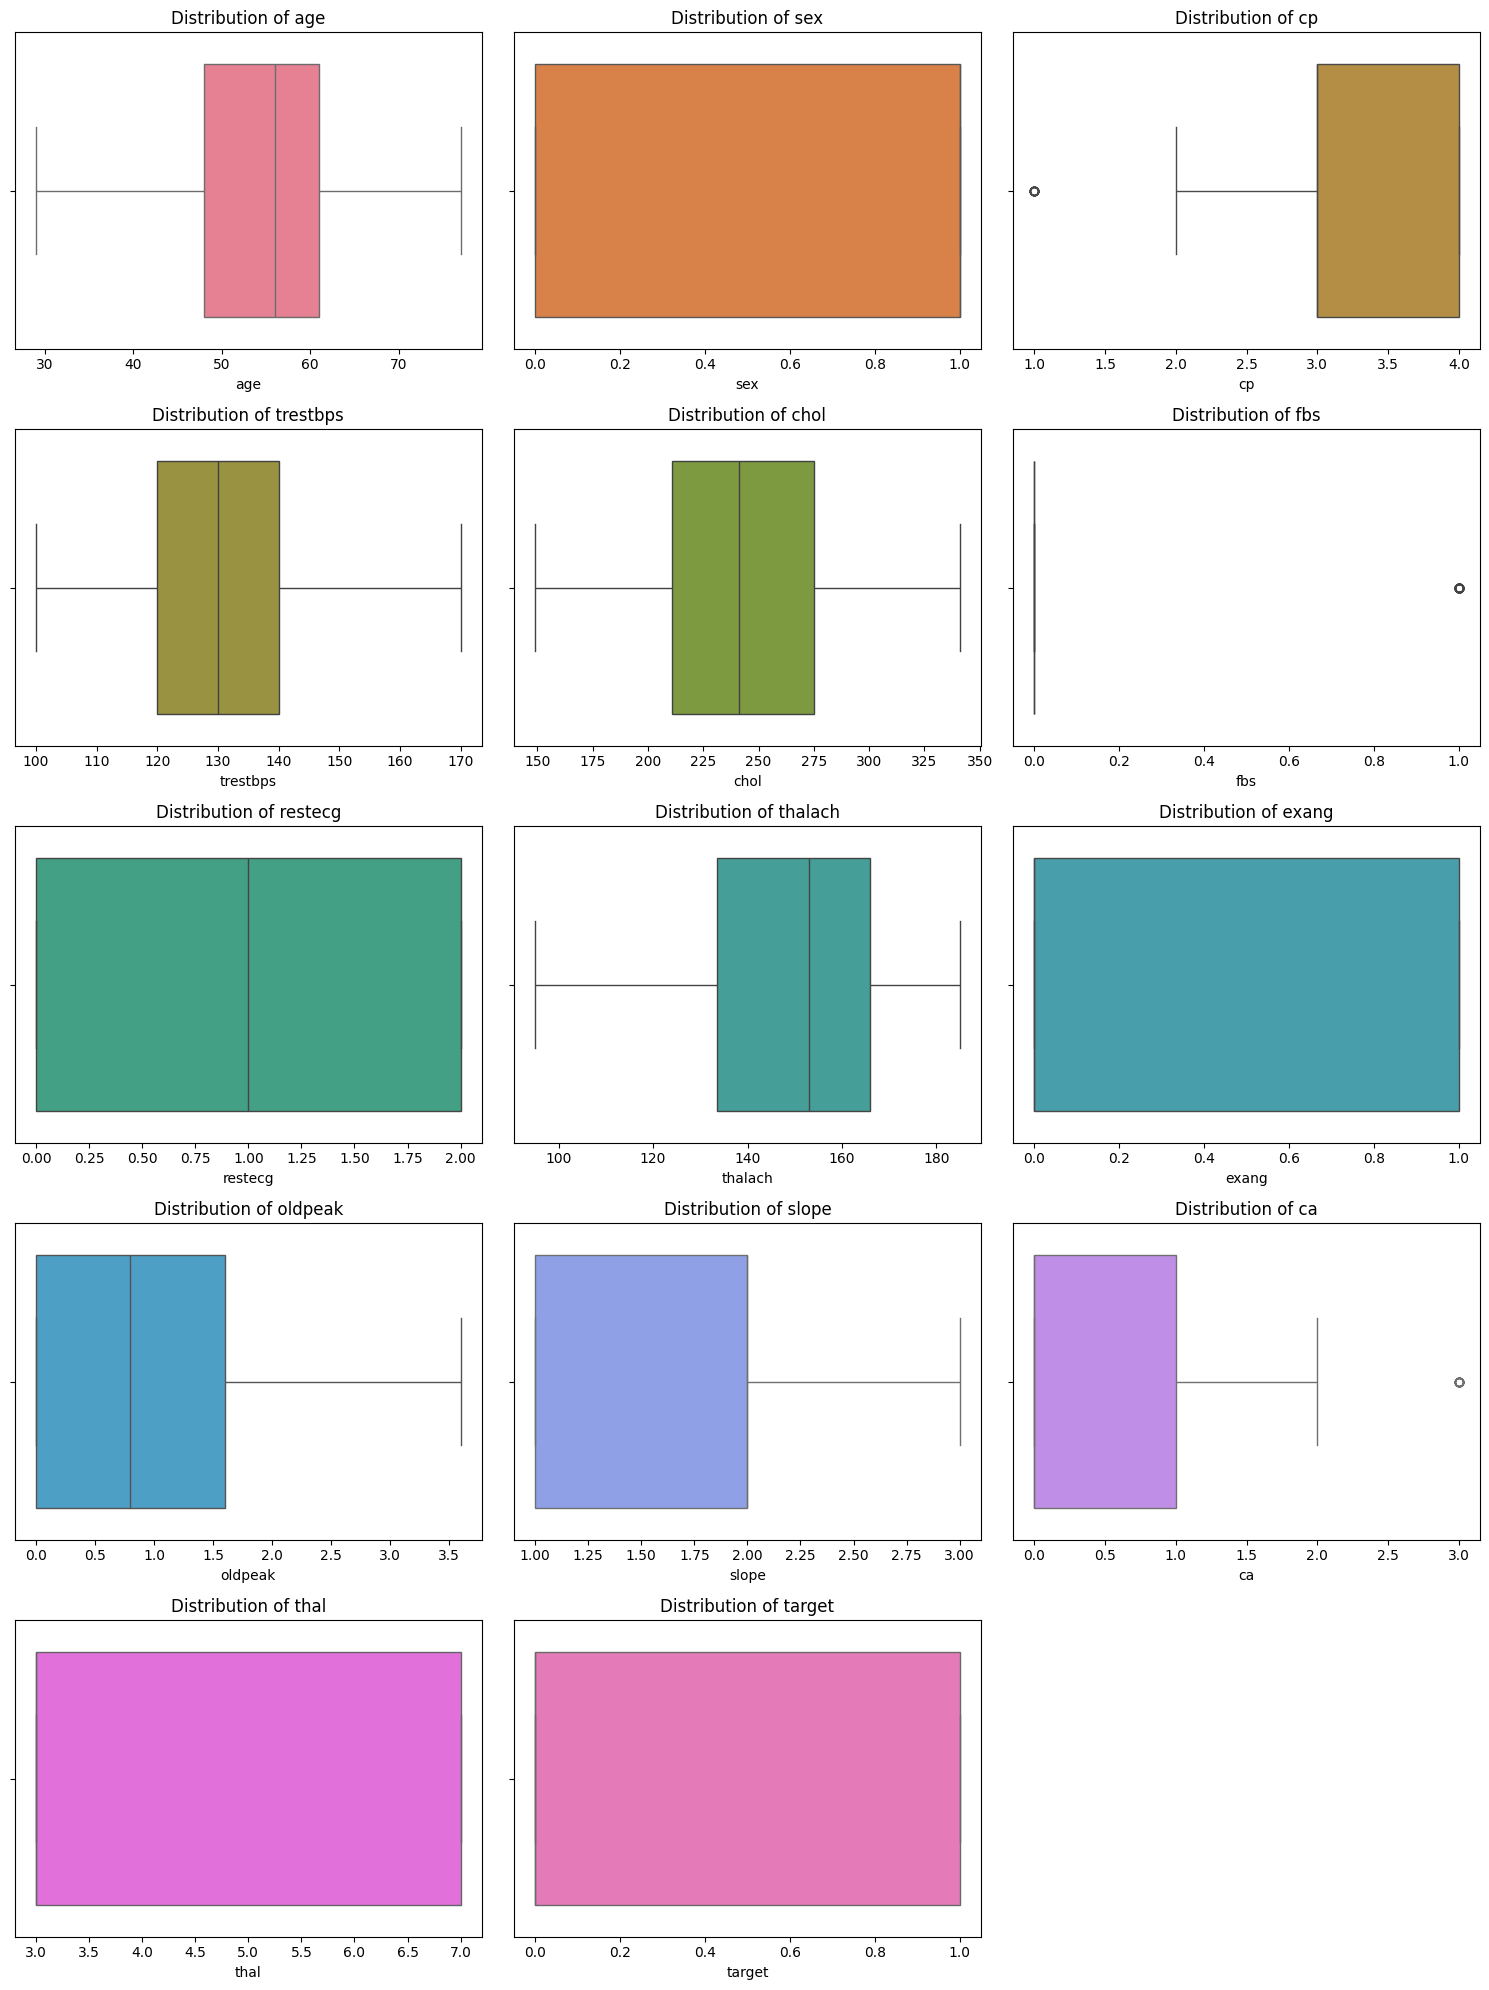

In [19]:
fig, axes = plt.subplots(5, 3, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(df.select_dtypes(include=np.number).columns):
    sns.boxplot(x=df[col], orient='h', color=custom_palette[i], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Analyze and discuss the relationships between the data attributes and between the data attributes and labels. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.

In [20]:
# Correlation Analysis with Category for cleaned data
correlation_matrix = df.corr() # Correlation matrix for the data

print("\nPearson Correlation Coefficients with Target:")
print(correlation_matrix['target'])


Pearson Correlation Coefficients with Target:
age         0.223120
sex         0.276816
cp          0.414446
trestbps    0.143495
chol        0.110063
fbs         0.025264
restecg     0.169202
thalach    -0.419255
exang       0.431894
oldpeak     0.432818
slope       0.339213
ca          0.460033
thal        0.522057
target      1.000000
Name: target, dtype: float64


The analysis of correlations between the data attributes and the target category reveals that attributes such as **thal** and **ca** exhibit positive relationships with the target, indicating their potential importance in predicting heart disease. Similarly, **oldpeak**, **cp** and **exang** also show similar positive correlations, suggesting that higher values in these attributes are associated with an increased likelihood of the target condition. Conversely, the attribute **thalach** displays a negative relationship, implying that lower maximum heart rates may correlate with a higher probability of heart disease. Weaker relationships are observed in attributes like **chol** and **trestbps**, indicating they may contribute less to the predictive power of the model. Finally, the attribute **fbs** shows almost no correlation with the target, suggesting it may be of limited relevance. These insights highlight the attributes that could be most valuable for classification, with stronger correlations likely enhancing model accuracy in predicting heart disease outcomes.

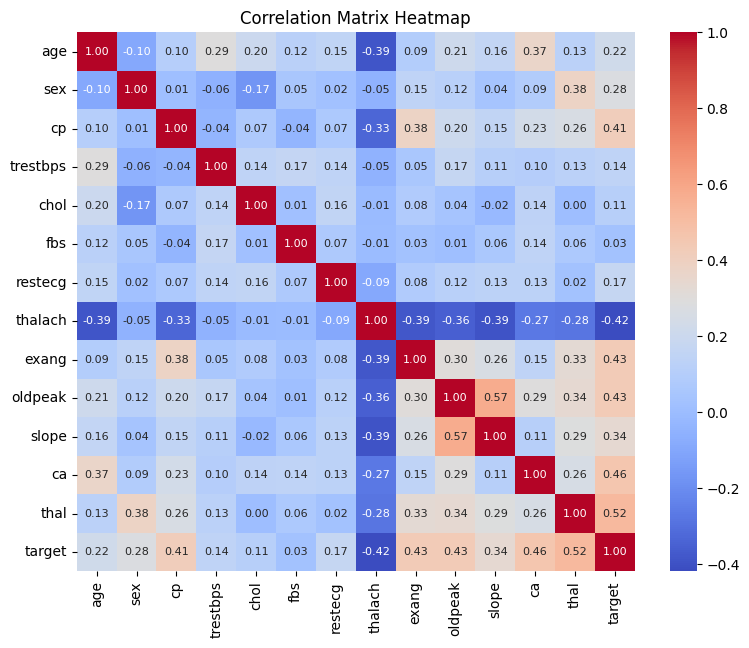

In [21]:
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title("Correlation Matrix Heatmap")
plt.show()

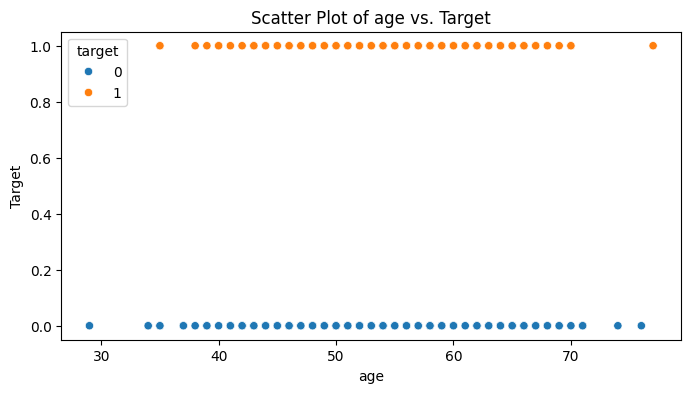

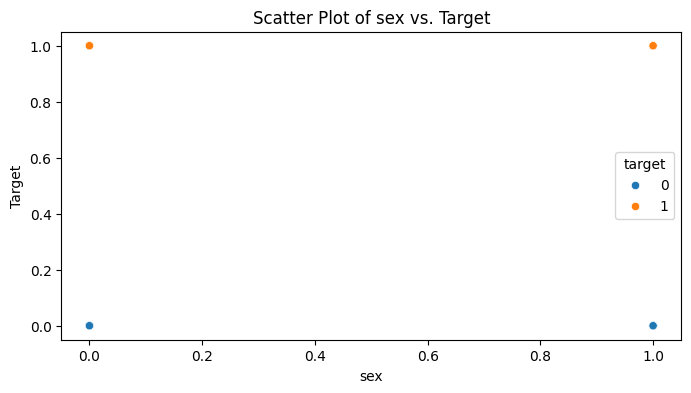

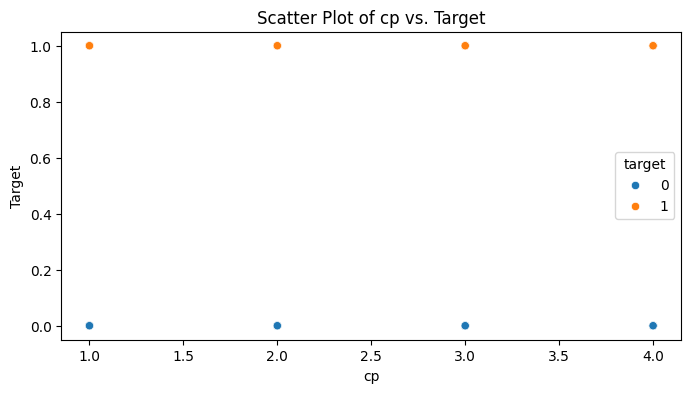

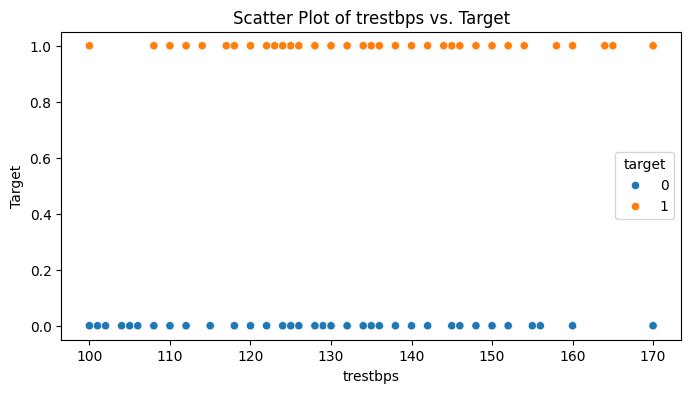

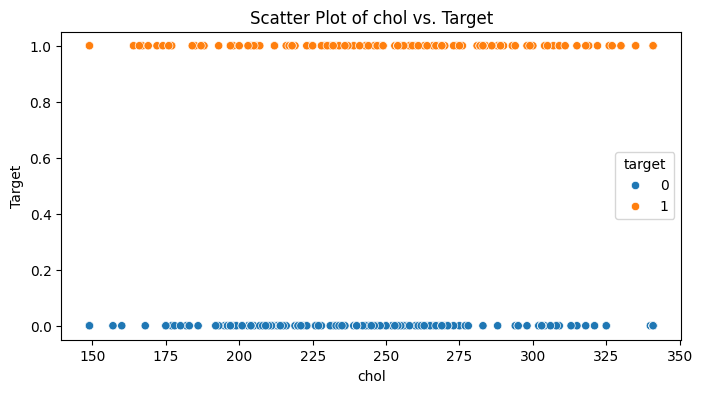

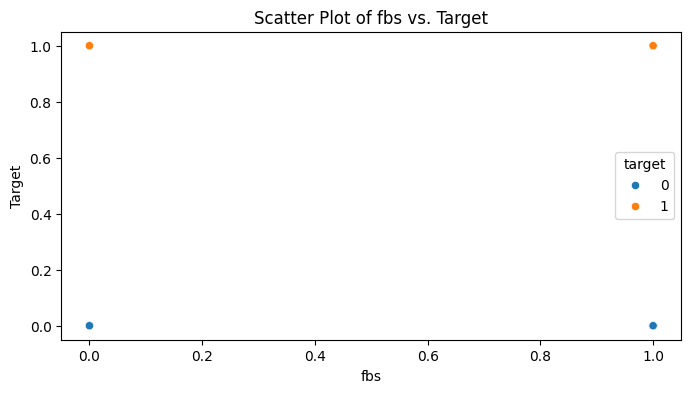

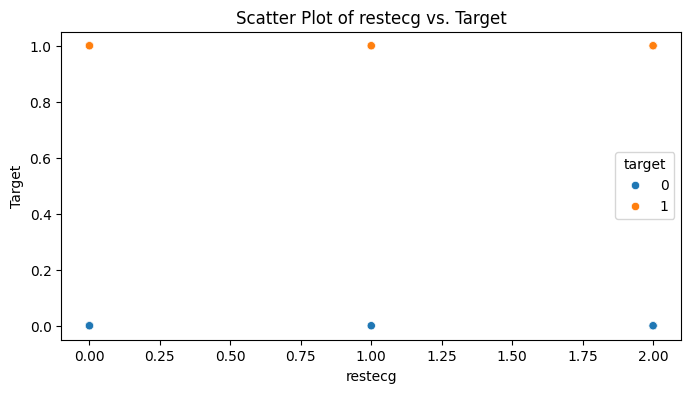

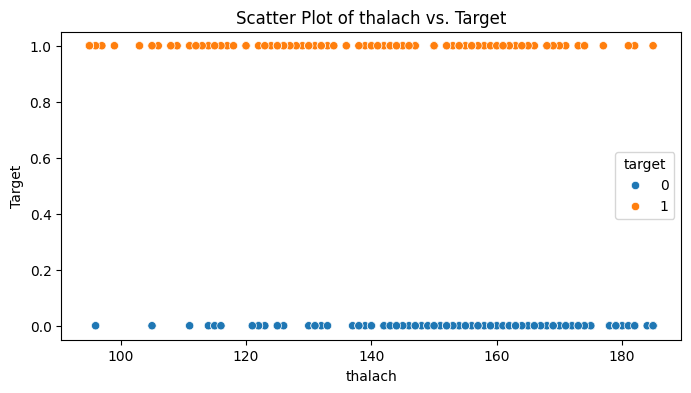

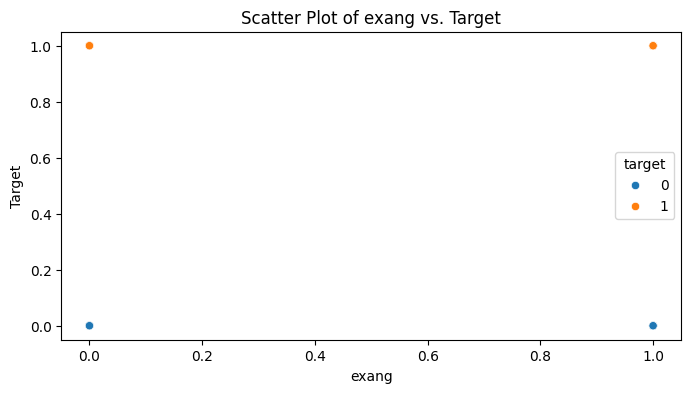

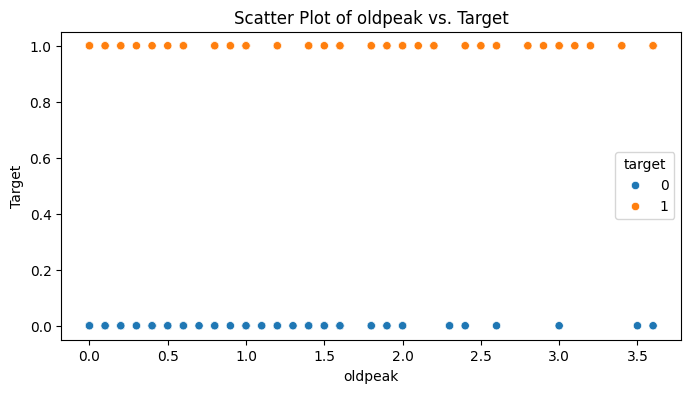

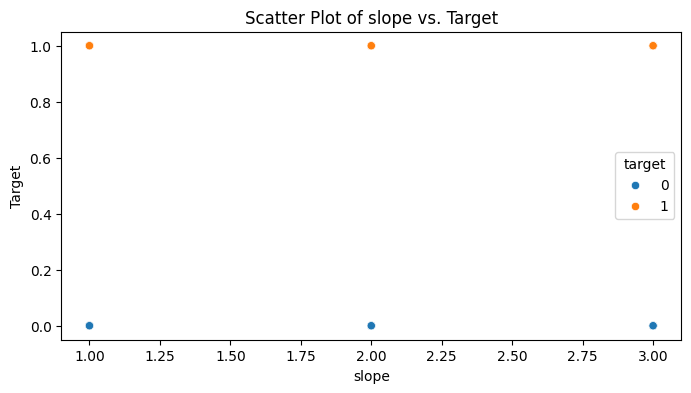

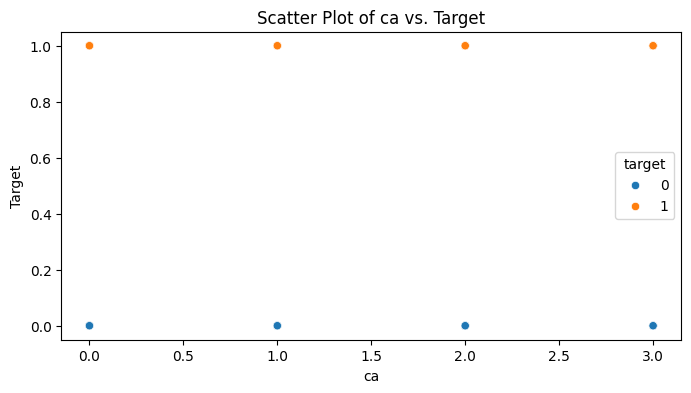

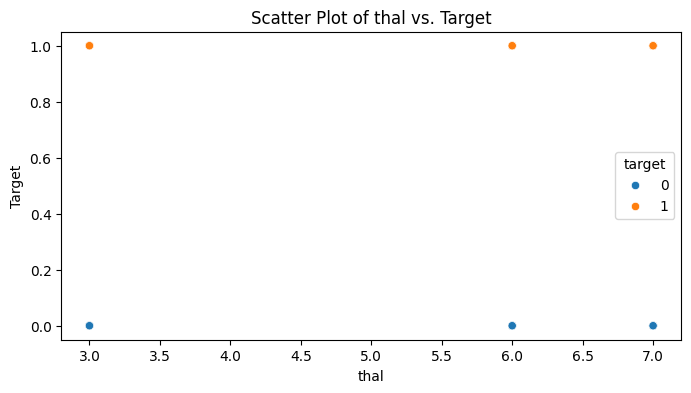

In [22]:
for col in df.columns[:-1]:  # Exclude the target column
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=df[col], y=df['target'], hue=df['target'])
    plt.title(f'Scatter Plot of {col} vs. Target')
    plt.xlabel(col)
    plt.ylabel('Target')
    plt.show()

## Split the data into training, testing and validation sets

In [23]:
# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Now split the scaled data
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled_df, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)

(181, 13) (61, 13) (61, 13)


In [24]:
# Verification of splitting
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

print("\nPercentage of target values in training set:")
print(y_train.value_counts(normalize=True))

print("\nPercentage of target values in validation set:")
print(y_val.value_counts(normalize=True))

print("\nPercentage of target values in testing set:")
print(y_test.value_counts(normalize=True))

Shape of X_train: (181, 13)
Shape of y_train: (181,)
Shape of X_val: (61, 13)
Shape of y_val: (61,)
Shape of X_test: (61, 13)
Shape of y_test: (61,)

Percentage of target values in training set:
target
0    0.552486
1    0.447514
Name: proportion, dtype: float64

Percentage of target values in validation set:
target
1    0.508197
0    0.491803
Name: proportion, dtype: float64

Percentage of target values in testing set:
target
0    0.557377
1    0.442623
Name: proportion, dtype: float64


## Train different classifiers and tweak the hyperparameters to improve performance (you can use the grid search if you want or manually try different values). Report training, validation and testing performance (classification accuracy, precision, recall and F1 score) and discuss the impact of the hyperparameters (use markdown cells in Jupyter Notebook to clearly indicate each solution):

**Multinomial Logistic Regression (Softmax Regression); hyperparameters to explore: C, solver, max number of iterations.**

**Support Vector Machine (make sure to try using kernels); hyperparameters to explore: C, kernel, degree of polynomial kernel, gamma.**

**Random Forest classifier (also analyze feature importance); hyperparameters to explore: the number of trees, max depth, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node**

In [25]:
def evaluate_model(y_true, y_pred):
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred, average='weighted')
  recall = recall_score(y_true, y_pred, average='weighted')
  f1 = f1_score(y_true, y_pred, average='weighted')
  return accuracy, precision, recall, f1

In [26]:
def report_performance(model_name, y_train_pred, y_val_pred, y_test_pred):
    print(f"\n{model_name}")
    print("Training Performance:")
    train_metrics = evaluate_model(y_train, y_train_pred)
    print(f"Accuracy: {train_metrics[0]:.4f}, Precision: {train_metrics[1]:.4f}, Recall: {train_metrics[2]:.4f}, F1-score: {train_metrics[3]:.4f}")

    print("\nValidation Performance:")
    val_metrics = evaluate_model(y_val, y_val_pred)
    print(f"Accuracy: {val_metrics[0]:.4f}, Precision: {val_metrics[1]:.4f}, Recall: {val_metrics[2]:.4f}, F1-score: {val_metrics[3]:.4f}")

    print("\nTesting Performance:")
    test_metrics = evaluate_model(y_test, y_test_pred)
    print(f"Accuracy: {test_metrics[0]:.4f}, Precision: {test_metrics[1]:.4f}, Recall: {test_metrics[2]:.4f}, F1-score: {test_metrics[3]:.4f}")
    return val_metrics[0], val_metrics[3]

In [27]:

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Multinomial Logistic Regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10,50, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100,200, 500, 1000]
}

# Initialize the Multinomial Logistic Regression model
lr_model = LogisticRegression()

# Perform Grid Search
grid_search_lr = GridSearchCV(lr_model, param_grid_lr, cv=5, scoring='accuracy',return_train_score=True)  # Use 5-fold cross-validation
grid_search_lr.fit(X_train, y_train)

print("\nAll Hyperparameter Combinations and their Performance:")
for i in range(len(grid_search_lr.cv_results_['params'])):
  params = grid_search_lr.cv_results_['params'][i]
  mean_train_score = grid_search_lr.cv_results_['mean_train_score'][i]
  mean_val_score = grid_search_lr.cv_results_['mean_test_score'][i]
  print(f"Params: {params}, Training Accuracy: {mean_train_score:.4f},␣ Validation Accuracy: {mean_val_score:.4f}")

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search_lr.best_params_)

# Evaluate the best model
best_lr_model = grid_search_lr.best_estimator_

y_train_pred_lr = best_lr_model.predict(X_train)
y_val_pred_lr = best_lr_model.predict(X_val)
y_test_pred_lr = best_lr_model.predict(X_test)

print(f"\nBest Logistic Regression Hyperparameters: {grid_search_lr.best_params_}")
val_acc_lr, val_f1_lr = report_performance("Multinomial Logistic Regression", y_train_pred_lr, y_val_pred_lr, y_test_pred_lr)


All Hyperparameter Combinations and their Performance:
Params: {'C': 0.001, 'max_iter': 100, 'solver': 'newton-cg'}, Training Accuracy: 0.6188,␣ Validation Accuracy: 0.6300
Params: {'C': 0.001, 'max_iter': 100, 'solver': 'lbfgs'}, Training Accuracy: 0.6188,␣ Validation Accuracy: 0.6300
Params: {'C': 0.001, 'max_iter': 100, 'solver': 'liblinear'}, Training Accuracy: 0.8342,␣ Validation Accuracy: 0.8065
Params: {'C': 0.001, 'max_iter': 100, 'solver': 'sag'}, Training Accuracy: 0.6188,␣ Validation Accuracy: 0.6300
Params: {'C': 0.001, 'max_iter': 100, 'solver': 'saga'}, Training Accuracy: 0.6188,␣ Validation Accuracy: 0.6300
Params: {'C': 0.001, 'max_iter': 200, 'solver': 'newton-cg'}, Training Accuracy: 0.6188,␣ Validation Accuracy: 0.6300
Params: {'C': 0.001, 'max_iter': 200, 'solver': 'lbfgs'}, Training Accuracy: 0.6188,␣ Validation Accuracy: 0.6300
Params: {'C': 0.001, 'max_iter': 200, 'solver': 'liblinear'}, Training Accuracy: 0.8342,␣ Validation Accuracy: 0.8065
Params: {'C': 0.001

Adjusting the hyperparameters in logistic regression had a noticeable impact on performance. Lower C values, especially around 0.01, provided stable validation accuracy, reaching the highest values at approximately 0.8231. These values allowed the model to generalize better on unseen data, as evidenced by the significant improvement in validation performance compared to configurations with higher C values, which often led to overfitting, indicated by the disparity between training and validation accuracies.

The choice of the solver also played a crucial role; the 'liblinear' solver showed high training accuracy but did not generalize as well as other solvers in terms of validation accuracy. As the number of iterations increased, there was minimal improvement in performance, suggesting that a balance between computation time and accuracy can be achieved at lower iteration counts.

In [28]:

# Define the parameter grid for SVC
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

# Initialize the SVC model
svc_model = SVC()

# Perform Grid Search
grid_search_svc = GridSearchCV(svc_model, param_grid_svc, cv=5, scoring='accuracy', return_train_score=True)
grid_search_svc.fit(X_train, y_train)

print("\nAll Hyperparameter Combinations and their Performance (SVC):")
for i in range(len(grid_search_svc.cv_results_['params'])):
    params = grid_search_svc.cv_results_['params'][i]
    mean_train_score = grid_search_svc.cv_results_['mean_train_score'][i]
    mean_val_score = grid_search_svc.cv_results_['mean_test_score'][i]
    print(f"Params: {params}, Training Accuracy: {mean_train_score:.4f}, Validation Accuracy: {mean_val_score:.4f}")

# Print the best hyperparameters
print("\nBest Hyperparameters (SVC):", grid_search_svc.best_params_)

# Evaluate the best model
best_svc_model = grid_search_svc.best_estimator_
y_train_pred_svc = best_svc_model.predict(X_train)
y_val_pred_svc = best_svc_model.predict(X_val)
y_test_pred_svc = best_svc_model.predict(X_test)

print(f"\nBest SVC Hyperparameters: {grid_search_svc.best_params_}")
val_acc_svc, val_f1_svc = report_performance("Support Vector Classifier", y_train_pred_svc, y_val_pred_svc, y_test_pred_svc)


All Hyperparameter Combinations and their Performance (SVC):
Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}, Training Accuracy: 0.8453, Validation Accuracy: 0.7953
Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}, Training Accuracy: 0.8370, Validation Accuracy: 0.8122
Params: {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}, Training Accuracy: 0.8453, Validation Accuracy: 0.7953
Params: {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}, Training Accuracy: 0.8370, Validation Accuracy: 0.8122
Params: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}, Training Accuracy: 0.8453, Validation Accuracy: 0.7953
Params: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}, Training Accuracy: 0.5953, Validation Accuracy: 0.5913
Params: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}, Training Accuracy: 0.8453, Validation Accuracy: 0.7953
Params: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}, Training Accuracy: 0.7955, Validation Accuracy: 0.7182
Params: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}, Training A

In [29]:
# Define the parameter grid for SVC
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['poly'],  #Use kernel = poly only
    'degree': [2, 3, 4],  # Explore different polynomial degrees
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

# Initialize the SVC model
svc_model = SVC()

# Perform Grid Search
grid_search_svc = GridSearchCV(svc_model, param_grid_svc, cv=5, scoring='accuracy', return_train_score=True)
grid_search_svc.fit(X_train, y_train)

print("\nAll Hyperparameter Combinations and their Performance (SVC):")
for i in range(len(grid_search_svc.cv_results_['params'])):
    params = grid_search_svc.cv_results_['params'][i]
    mean_train_score = grid_search_svc.cv_results_['mean_train_score'][i]
    mean_val_score = grid_search_svc.cv_results_['mean_test_score'][i]
    print(f"Params: {params}, Training Accuracy: {mean_train_score:.4f}, Validation Accuracy: {mean_val_score:.4f}")

# Print the best hyperparameters
print("\nBest Hyperparameters (Polynomial SVC):", grid_search_svc.best_params_)

# Evaluate the best model
best_svc_poly_model = grid_search_svc.best_estimator_
y_train_pred_svc = best_svc_poly_model.predict(X_train)
y_val_pred_svc = best_svc_poly_model.predict(X_val)
y_test_pred_svc = best_svc_poly_model.predict(X_test)

print(f"\nBest Polynomial SVC Hyperparameters: {grid_search_svc.best_params_}")
val_acc_svc, val_f1_svc = report_performance("Support Vector Classifier", y_train_pred_svc, y_val_pred_svc, y_test_pred_svc)



All Hyperparameter Combinations and their Performance (SVC):
Params: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}, Training Accuracy: 0.5566, Validation Accuracy: 0.5526
Params: {'C': 0.1, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}, Training Accuracy: 0.5566, Validation Accuracy: 0.5526
Params: {'C': 0.1, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}, Training Accuracy: 0.5525, Validation Accuracy: 0.5526
Params: {'C': 0.1, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}, Training Accuracy: 0.6036, Validation Accuracy: 0.5803
Params: {'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}, Training Accuracy: 0.9641, Validation Accuracy: 0.6414
Params: {'C': 0.1, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}, Training Accuracy: 0.7251, Validation Accuracy: 0.6964
Params: {'C': 0.1, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}, Training Accuracy: 0.7237, Validation Accuracy: 0.6799
Params: {'C': 0.1, 'degree': 3, 'gamma': 0.01, 'kernel': 'poly'}, Training Accuracy: 

In this SVC grid search, C, gamma, and kernel parameters significantly impact model performance. The C parameter controls regularization; lower C values encourage simpler decision boundaries, while higher C allows more complex boundaries but risks overfitting. The gamma parameter, especially impactful in the RBF kernel, determines influence scope of individual data points. Lower gamma values create smoother boundaries, whereas higher values lead to more complex models. Here, RBF kernels with high gamma often overfit, while linear kernels are more stable. The best configuration (C=1, gamma=0.01, kernel='rbf') balances complexity and generalizability, achieving optimal validation accuracy and reduced overfitting.

For polynomial kernel, high regularization values (e.g., C = 100) and polynomial degrees above 2 often led to overfitting, shown by higher training accuracy than validation accuracy. There's a reduction in performance from training to validation and testing suggests a model overfitting a bit over the training set..

In [30]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', return_train_score=True)
grid_search_rf.fit(X_train, y_train)

print("\nAll Hyperparameter Combinations and their Performance (Random Forest):")
for i in range(len(grid_search_rf.cv_results_['params'])):
    params = grid_search_rf.cv_results_['params'][i]
    mean_train_score = grid_search_rf.cv_results_['mean_train_score'][i]
    mean_val_score = grid_search_rf.cv_results_['mean_test_score'][i]
    print(f"Params: {params}, Training Accuracy: {mean_train_score:.4f}, Validation Accuracy: {mean_val_score:.4f}")

# Print the best hyperparameters
print("\nBest Hyperparameters (Random Forest):", grid_search_rf.best_params_)

# Evaluate the best model
best_rf_model = grid_search_rf.best_estimator_
y_train_pred_rf = best_rf_model.predict(X_train)
y_val_pred_rf = best_rf_model.predict(X_val)
y_test_pred_rf = best_rf_model.predict(X_test)

print(f"\nBest Random Forest Hyperparameters: {grid_search_rf.best_params_}")
val_acc_rf, val_f1_rf = report_performance("Random Forest Classifier", y_train_pred_rf, y_val_pred_rf, y_test_pred_rf)


# Analyze feature importance
feature_importances = best_rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
feature_importance_df


All Hyperparameter Combinations and their Performance (Random Forest):
Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}, Training Accuracy: 1.0000, Validation Accuracy: 0.8177
Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}, Training Accuracy: 1.0000, Validation Accuracy: 0.8119
Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}, Training Accuracy: 1.0000, Validation Accuracy: 0.8063
Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}, Training Accuracy: 0.9889, Validation Accuracy: 0.8065
Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}, Training Accuracy: 0.9890, Validation Accuracy: 0.8008
Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}, Training Accuracy: 0.9903, Validation Accuracy: 0.8119
Params: {'max_dept

,Feature,Importance
11,ca,0.169629
2,cp,0.150136
12,thal,0.139514
7,thalach,0.101909
9,oldpeak,0.088410
0,age,0.075941
4,chol,0.060973
10,slope,0.054312
8,exang,0.051432
1,sex,0.049463


The results from the Random Forest hyperparameter tuning indicate a high level of training accuracy, with some configurations achieving 100%. However, the validation accuracy varied, suggesting potential overfitting in the best-performing models. Notably, the optimal hyperparameters were {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}, which yielded a validation accuracy of 84.52%. The overall classifier performance showed a solid training accuracy of 95.03% and a validation accuracy of 85.25%. This suggests that while the model performs well on training data, further validation is necessary to ensure its generalizability.

## Combine your classifiers into an ensemble and try to outperform each individual classifier on the validation set. Once you have found a good one, try it on the test set. Describe and discuss your findings

In [31]:
from sklearn.ensemble import VotingClassifier

# Create a voting classifier with the best models
ensemble_model = VotingClassifier(estimators=[
    ('lr', best_lr_model),
    ('svc', best_svc_model),
    ('rf', best_rf_model)
], voting='hard')


ensemble_model.fit(X_train, y_train)
y_val_pred_ensemble = ensemble_model.predict(X_val)
y_test_pred_ensemble = ensemble_model.predict(X_test)

val_acc_ensemble_hard, val_f1_ensemble_hard = report_performance("Ensemble Classifier", ensemble_model.predict(X_train), y_val_pred_ensemble, y_test_pred_ensemble)

print(f"\nEnsemble Validation Accuracy: {val_acc_ensemble_hard}")
print(f"Ensemble Validation F1-score: {val_f1_ensemble_hard}")

print(f"\nLogistic Regression Validation Accuracy: {val_acc_lr}")
print(f"Logistic Regression Validation F1-score: {val_f1_lr}")

print(f"\nSVC Validation Accuracy: {val_acc_svc}")
print(f"SVC Validation F1-score: {val_f1_svc}")

print(f"\nRandom Forest Validation Accuracy: {val_acc_rf}")
print(f"Random Forest Validation F1-score: {val_f1_rf}")


Ensemble Classifier
Training Performance:
Accuracy: 0.8453, Precision: 0.8539, Recall: 0.8453, F1-score: 0.8426

Validation Performance:
Accuracy: 0.9180, Precision: 0.9222, Recall: 0.9180, F1-score: 0.9179

Testing Performance:
Accuracy: 0.8361, Precision: 0.8361, Recall: 0.8361, F1-score: 0.8361

Ensemble Validation Accuracy: 0.9180327868852459
Ensemble Validation F1-score: 0.9179004749996692

Logistic Regression Validation Accuracy: 0.8852459016393442
Logistic Regression Validation F1-score: 0.8846264463175593

SVC Validation Accuracy: 0.8852459016393442
SVC Validation F1-score: 0.8846264463175593

Random Forest Validation Accuracy: 0.8524590163934426
Random Forest Validation F1-score: 0.8524590163934426


In [32]:
from sklearn.ensemble import VotingClassifier

# Create a voting classifier with the best models
ensemble_model = VotingClassifier(estimators=[
    ('lr', best_lr_model),
    ('rf', best_rf_model)
], voting='soft')


ensemble_model.fit(X_train, y_train)
y_val_pred_ensemble = ensemble_model.predict(X_val)
y_test_pred_ensemble = ensemble_model.predict(X_test)

val_acc_ensemble_soft, val_f1_ensemble_soft = report_performance("Ensemble Classifier", ensemble_model.predict(X_train), y_val_pred_ensemble, y_test_pred_ensemble)

print(f"\nEnsemble Validation Accuracy: {val_acc_ensemble_soft}")
print(f"Ensemble Validation F1-score: {val_f1_ensemble_soft}")

print(f"\nLogistic Regression Validation Accuracy: {val_acc_lr}")
print(f"Logistic Regression Validation F1-score: {val_f1_lr}")

print(f"\nSVC Validation Accuracy: {val_acc_svc}")
print(f"SVC Validation F1-score: {val_f1_svc}")

print(f"\nRandom Forest Validation Accuracy: {val_acc_rf}")
print(f"Random Forest Validation F1-score: {val_f1_rf}")


Ensemble Classifier
Training Performance:
Accuracy: 0.9006, Precision: 0.9045, Recall: 0.9006, F1-score: 0.8996

Validation Performance:
Accuracy: 0.9180, Precision: 0.9222, Recall: 0.9180, F1-score: 0.9179

Testing Performance:
Accuracy: 0.8361, Precision: 0.8363, Recall: 0.8361, F1-score: 0.8353

Ensemble Validation Accuracy: 0.9180327868852459
Ensemble Validation F1-score: 0.9179004749996692

Logistic Regression Validation Accuracy: 0.8852459016393442
Logistic Regression Validation F1-score: 0.8846264463175593

SVC Validation Accuracy: 0.8852459016393442
SVC Validation F1-score: 0.8846264463175593

Random Forest Validation Accuracy: 0.8524590163934426
Random Forest Validation F1-score: 0.8524590163934426


In [35]:
# Create a dictionary to store the results
model_performance = {
    "Model": ["Logistic Regression", "SVC", "Random Forest", "Ensemble (Hard Voting)", "Ensemble (Soft Voting)"],
    "Validation Accuracy": [val_acc_lr, val_acc_svc, val_acc_rf, val_acc_ensemble_hard, val_acc_ensemble_soft],
    "Validation F1-score": [val_f1_lr, val_f1_svc, val_f1_rf, val_f1_ensemble_hard, val_f1_ensemble_soft]
}

# Convert the results into a pandas DataFrame
performance_df = pd.DataFrame(model_performance)

# Display the DataFrame
performance_df

,Model,Validation Accuracy,Validation F1-score
0,Logistic Regression,0.885246,0.884626
1,SVC,0.885246,0.884626
2,Random Forest,0.852459,0.852459
3,Ensemble (Hard Voting),0.918033,0.917900
4,Ensemble (Soft Voting),0.918033,0.917900


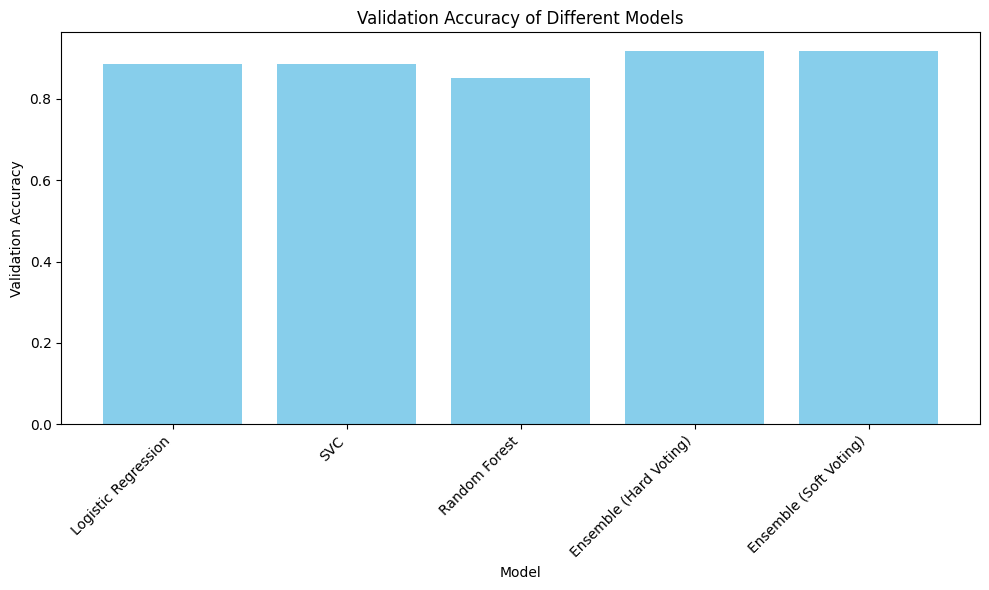

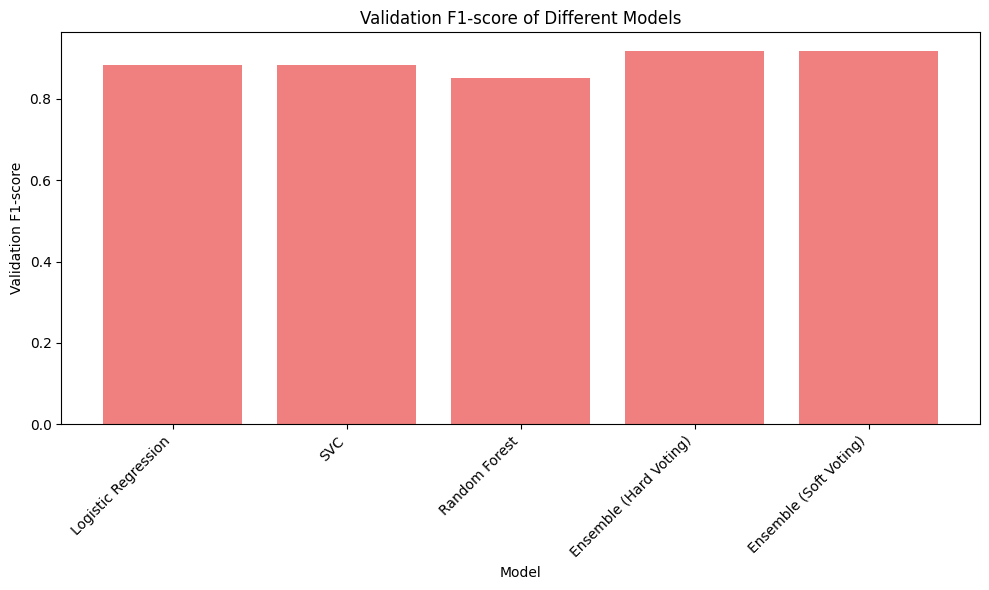

Best model based on validation accuracy:
Model                  Ensemble (Hard Voting)
Validation Accuracy                  0.918033
Validation F1-score                    0.9179
Name: 3, dtype: object

Best model based on validation F1-score:
Model                  Ensemble (Hard Voting)
Validation Accuracy                  0.918033
Validation F1-score                    0.9179
Name: 3, dtype: object


In [36]:
# Plotting Validation Accuracy
plt.figure(figsize=(10, 6))
plt.bar(performance_df["Model"], performance_df["Validation Accuracy"], color='skyblue')
plt.xlabel("Model")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy of Different Models")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Plotting Validation F1-score
plt.figure(figsize=(10, 6))
plt.bar(performance_df["Model"], performance_df["Validation F1-score"], color='lightcoral')
plt.xlabel("Model")
plt.ylabel("Validation F1-score")
plt.title("Validation F1-score of Different Models")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Determine the best model based on validation accuracy
best_model_accuracy = performance_df.loc[performance_df["Validation Accuracy"].idxmax()]
print(f"Best model based on validation accuracy:\n{best_model_accuracy}")

# Determine the best model based on validation F1-score
best_model_f1 = performance_df.loc[performance_df["Validation F1-score"].idxmax()]
print(f"\nBest model based on validation F1-score:\n{best_model_f1}")

Although the above code gives Hard Voting Ensemble as the best model, soft voting and hard voting ensembles both have the same accuracies achieved on the test set while the F1 score for Hard voting on the test set came out to be minutely greater than that of soft voting. In case of the validation scores, both the ensemble techniques perform signicantly well than that of the individual classifiers with validation accuracy and validation F1 score equal to 0.918033 and 0.9179 respectively.

